<a href="https://colab.research.google.com/github/slickHnaa/Career_Accelerator_LP3-Classifcation/blob/main/01_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Questions**

Do senior citizens have a higher churn rate than others?

Do customers with dependents have higher church rates?

Does age and gender contribute to the churn rate?

Is there a relationship between tunure and churn rate?

Does the contract term affect the churn rate?

Does number of services signed on to affect churn rate?

# **Hypothesis**

The contract term affects attrition


**Null Hypothesis**

The contract tern does not affect attrition 


**Alternate hypothesis**

The contract term affects attrition

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#relevant ML libraries
from imblearn.over_sampling import ADASYN
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold,StratifiedKFold,RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score
import sklearn.metrics as metrics
from sklearn.neighbors import LocalOutlierFactor



#ML models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier

warnings.filterwarnings('ignore')

In [3]:
c_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LP3/Telco-Customer-Churn.csv')
c_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#  Exploratory Data Analysis

## Data Cleaning

In [4]:
c_data.shape

(7043, 21)

In [5]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The total charges columns has a data type of an object instead of a float. This must be converted.

In [6]:
c_data['TotalCharges'] = pd.to_numeric(c_data['TotalCharges'], errors='coerce')

In [7]:
c_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [8]:
c_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are 11 missing values in the Total Charge column which is very insignificant compared with the total number of entries. Therefore these missing values will be dropped

In [9]:
# Removing missing values
c_data.dropna(inplace=True)

In [10]:
c_data.duplicated().sum()

0

There is no duplicated elements in the dataset

In [11]:
c_data.shape

(7032, 21)

The ID column as no use and will be removed

In [12]:
#removing ID column
c_data = c_data.iloc[:,1:]

In [13]:
for column in c_data.columns:
  print(column, ':', c_data[column].nunique())


gender : 2
SeniorCitizen : 2
Partner : 2
Dependents : 2
tenure : 72
PhoneService : 2
MultipleLines : 3
InternetService : 3
OnlineSecurity : 3
OnlineBackup : 3
DeviceProtection : 3
TechSupport : 3
StreamingTV : 3
StreamingMovies : 3
Contract : 3
PaperlessBilling : 2
PaymentMethod : 4
MonthlyCharges : 1584
TotalCharges : 6530
Churn : 2


In [14]:
LE = preprocessing.LabelEncoder()
c_data['Churn'] = LE.fit_transform(c_data['Churn'])
c_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


# Univariate and Bivariate Analysis

## Univariate Analysis

In [15]:
c_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80
Churn,7032.0,0.265785,0.441782,0.00,0.0000,0.000,1.0000,1.00


## **What is the distribution of Billing?**
Billing include the following headings
- Tenure
- Contract
- Paperles Billing
- Payment Method
- Monthly Charge
- Total Charge

#### Monthly Charges



[Text(0.5, 1.0, 'distribution of Monthly Charges')]

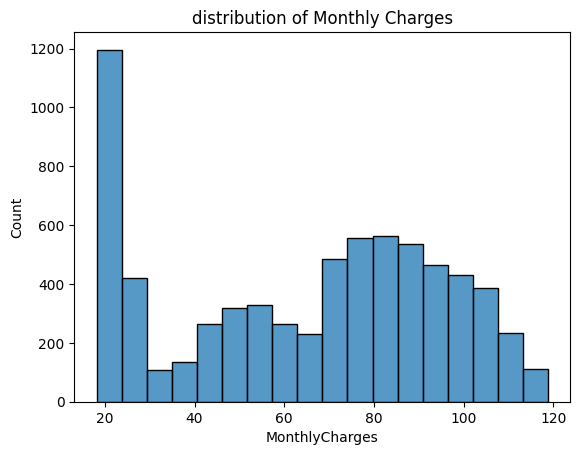

In [16]:
sns.histplot(x = 'MonthlyCharges', data = c_data).set(title = 'distribution of Monthly Charges')

#### Most customers are charged \$20. Generally, the distribution of monthly charges is skewed to the right. Apart from \$20, most customers are charged between \$40 to \$110.

#### Tenure

[Text(0.5, 1.0, 'Tunure Across Board')]

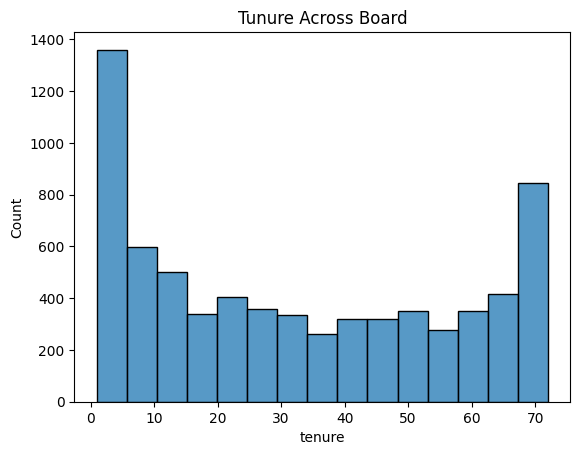

In [17]:
sns.histplot(x = 'tenure', data = c_data).set(title = 'Tunure Across Board')

A lot of new customers sign up for the services and stay generally for 74 months.

#### Paperless Billing

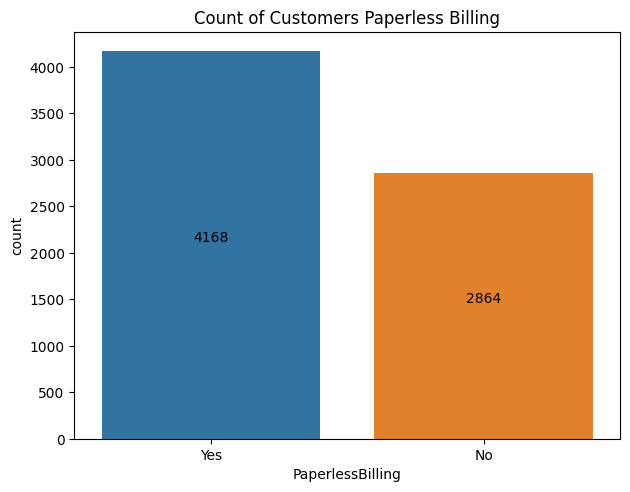

In [18]:
ax = sns.countplot(x='PaperlessBilling',data=c_data)
vc = c_data['PaperlessBilling'].value_counts()
for p in ax.patches:
    # Get the x and y coordinates of the bar
    x_coord = p.get_x() + p.get_width() / 2
    y_coord = p.get_height()
    
    # Format the text you want to display as the annotation
    count = int(y_coord)  # Convert the count to an integer if needed
    text = f'{count}'  # Customize the text as desired
    
    # Add the annotation to the plot
    ax.text(x=x_coord, y=y_coord/2, s=text, ha='center', va='bottom')
plt.tight_layout()
plt.title('Count of Customers Paperless Billing')
plt.show()

#### Payment Method

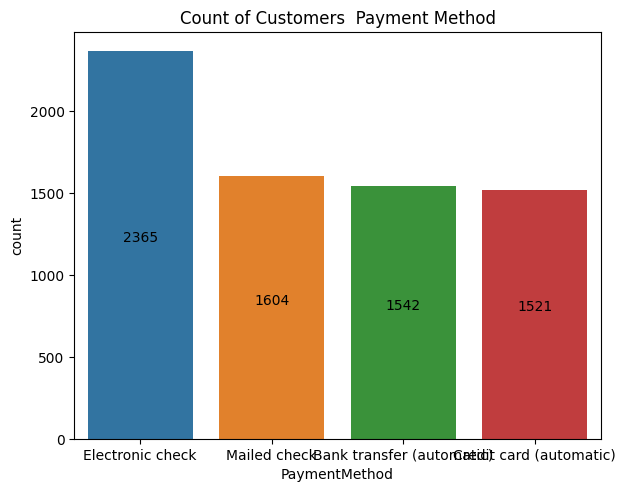

In [19]:
ax = sns.countplot(x='PaymentMethod',data=c_data)
vc = c_data['PaymentMethod'].value_counts()
for p in ax.patches:
    # Get the x and y coordinates of the bar
    x_coord = p.get_x() + p.get_width() / 2
    y_coord = p.get_height()
    
    # Format the text you want to display as the annotation
    count = int(y_coord)  # Convert the count to an integer if needed
    text = f'{count}'  # Customize the text as desired
    
    # Add the annotation to the plot
    ax.text(x=x_coord, y=y_coord/2, s=text, ha='center', va='bottom')
plt.tight_layout()
plt.title('Count of Customers  Payment Method')
plt.show()

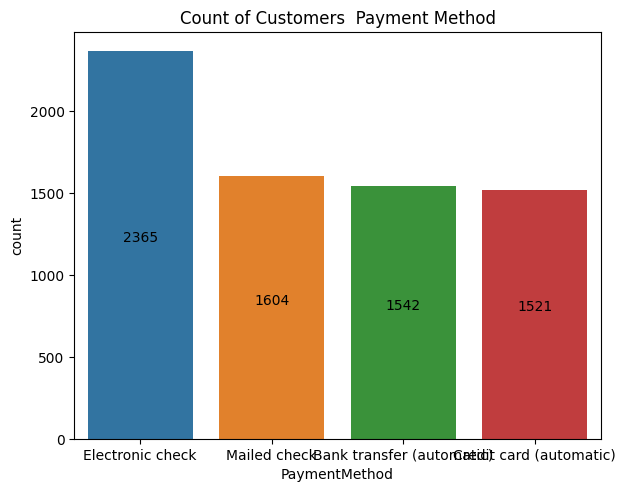

In [20]:
ax = sns.countplot(x='PaymentMethod',data=c_data)
vc = c_data['PaymentMethod'].value_counts()
for p in ax.patches:
    # Get the x and y coordinates of the bar
    x_coord = p.get_x() + p.get_width() / 2
    y_coord = p.get_height()
    
    # Format the text you want to display as the annotation
    count = int(y_coord)  # Convert the count to an integer if needed
    text = f'{count}'  # Customize the text as desired
    
    # Add the annotation to the plot
    ax.text(x=x_coord, y=y_coord/2, s=text, ha='center', va='bottom')
plt.tight_layout()
plt.title('Count of Customers  Payment Method')
plt.show()

#### Distribution of Monthly Charges

[Text(0.5, 1.0, 'Distribution of Monthly Charges')]

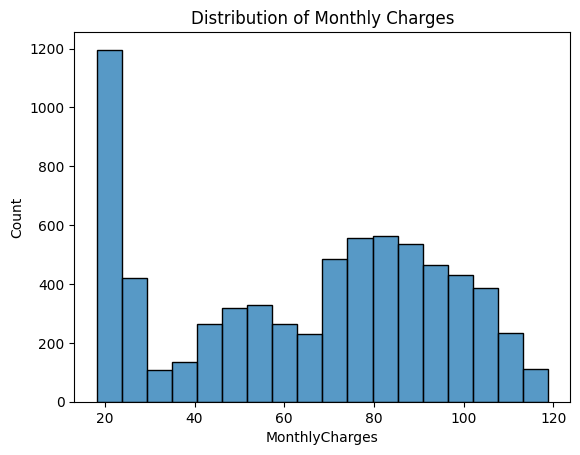

In [21]:
sns.histplot(x = 'MonthlyCharges', data = c_data).set(title = 'Distribution of Monthly Charges')

[Text(0.5, 1.0, 'Distribution of Total Charges')]

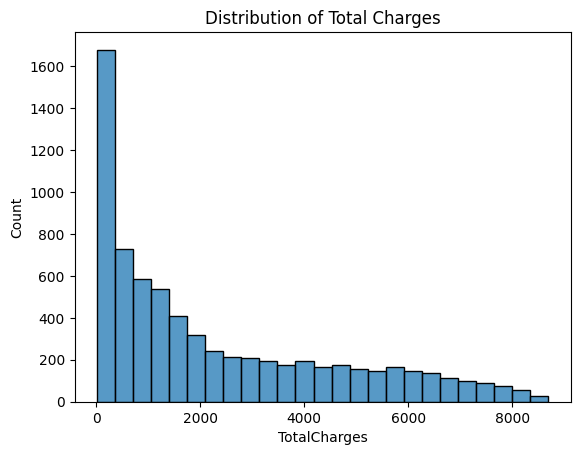

In [22]:
sns.histplot(x = 'TotalCharges', data = c_data).set(title = 'Distribution of Total Charges')


#### Count of Customers  Contract

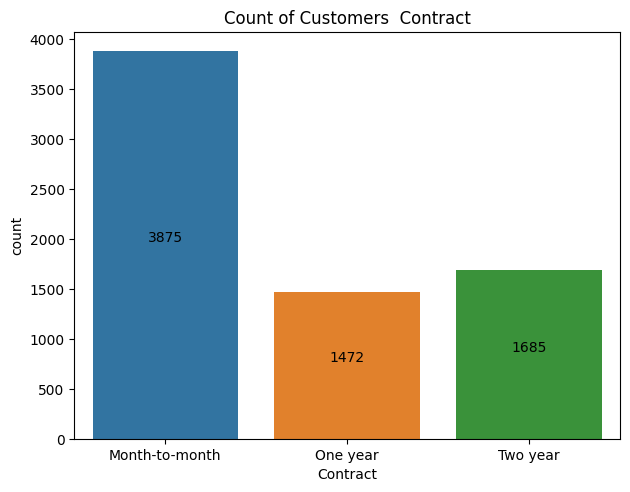

In [23]:
ax = sns.countplot(x='Contract',data=c_data)
vc = c_data['Contract'].value_counts()
for p in ax.patches:
    # Get the x and y coordinates of the bar
    x_coord = p.get_x() + p.get_width() / 2
    y_coord = p.get_height()
    
    # Format the text you want to display as the annotation
    count = int(y_coord)  # Convert the count to an integer if needed
    text = f'{count}'  # Customize the text as desired
    
    # Add the annotation to the plot
    ax.text(x=x_coord, y=y_coord/2, s=text, ha='center', va='bottom')
plt.tight_layout()
plt.title('Count of Customers  Contract')
plt.show()

### Count of Customer who Churn or not

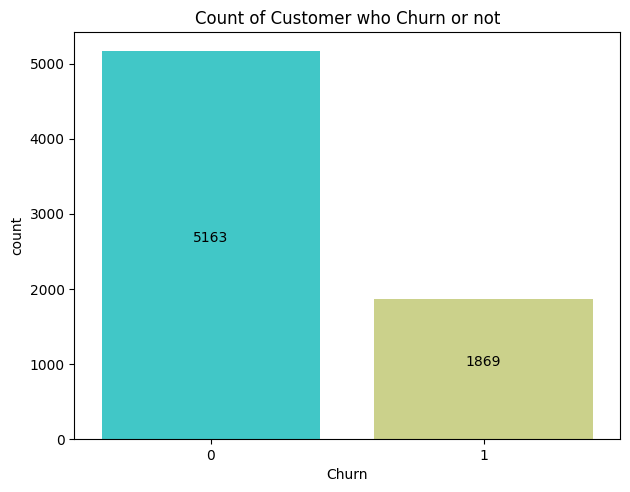

In [24]:
ax = sns.countplot(x='Churn',data=c_data, palette='rainbow')
vc = c_data['Churn'].value_counts()
for p in ax.patches:
    # Get the x and y coordinates of the bar
    x_coord = p.get_x() + p.get_width() / 2
    y_coord = p.get_height()
    
    # Format the text you want to display as the annotation
    count = int(y_coord)  # Convert the count to an integer if needed
    text = f'{count}'  # Customize the text as desired
    
    # Add the annotation to the plot
    ax.text(x=x_coord, y=y_coord/2, s=text, ha='center', va='bottom')
plt.tight_layout()
plt.title('Count of Customer who Churn or not')
plt.show()

5174 customers did not churn whiles 1869 churn. This makes target variable inblances

### Exploration Into Customer

#### Count of Gender

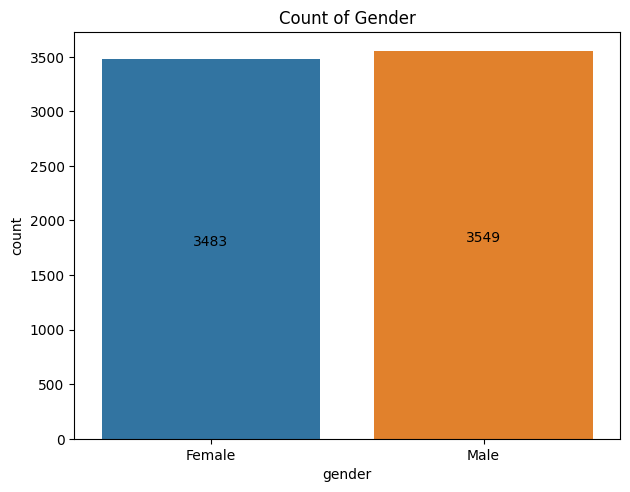

In [25]:
ax = sns.countplot(x='gender',data=c_data)
vc = c_data['gender'].value_counts()
for p in ax.patches:
    # Get the x and y coordinates of the bar
    x_coord = p.get_x() + p.get_width() / 2
    y_coord = p.get_height()
    
    # Format the text you want to display as the annotation
    count = int(y_coord)  # Convert the count to an integer if needed
    text = f'{count}'  # Customize the text as desired
    
    # Add the annotation to the plot
    ax.text(x=x_coord, y=y_coord/2, s=text, ha='center', va='bottom')
plt.tight_layout()
plt.title('Count of Gender')
plt.show()

The dataset contains 3488 females and 3555 males

#### Count of Customers with Partner

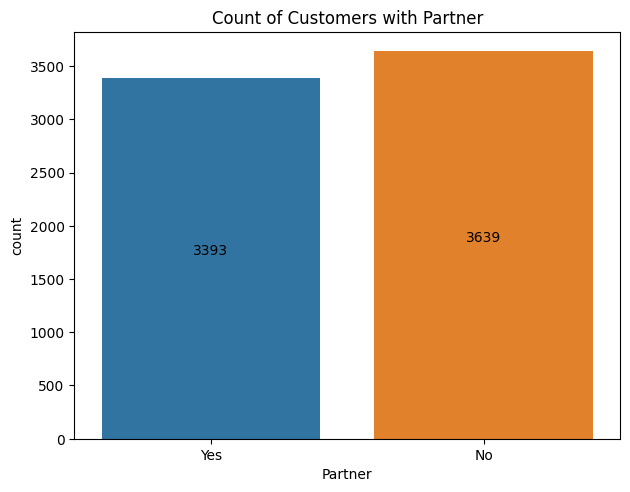

In [26]:
ax = sns.countplot(x='Partner',data=c_data)
vc = c_data['Partner'].value_counts()
for p in ax.patches:
    # Get the x and y coordinates of the bar
    x_coord = p.get_x() + p.get_width() / 2
    y_coord = p.get_height()
    
    # Format the text you want to display as the annotation
    count = int(y_coord)  # Convert the count to an integer if needed
    text = f'{count}'  # Customize the text as desired
    
    # Add the annotation to the plot
    ax.text(x=x_coord, y=y_coord/2, s=text, ha='center', va='bottom')
plt.tight_layout()
plt.title('Count of Customers with Partner')
plt.show()

The difference between customers with partners and those without partner is 243 which is approximately 3.45% of all customers

#### Count of Customers with Dependents

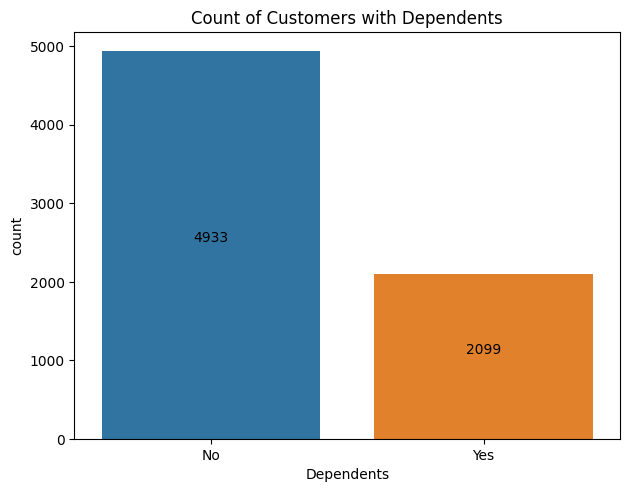

In [27]:
ax = sns.countplot(x='Dependents',data=c_data)
vc = c_data['Dependents'].value_counts()
for p in ax.patches:
    # Get the x and y coordinates of the bar
    x_coord = p.get_x() + p.get_width() / 2
    y_coord = p.get_height()
    
    # Format the text you want to display as the annotation
    count = int(y_coord)  # Convert the count to an integer if needed
    text = f'{count}'  # Customize the text as desired
    
    # Add the annotation to the plot
    ax.text(x=x_coord, y=y_coord/2, s=text, ha='center', va='bottom')
plt.tight_layout()
plt.title('Count of Customers with Dependents')
plt.show()

About 4933 customer do not have dependents whiles 2110 have dependents 

#### Count of Senior Citizen


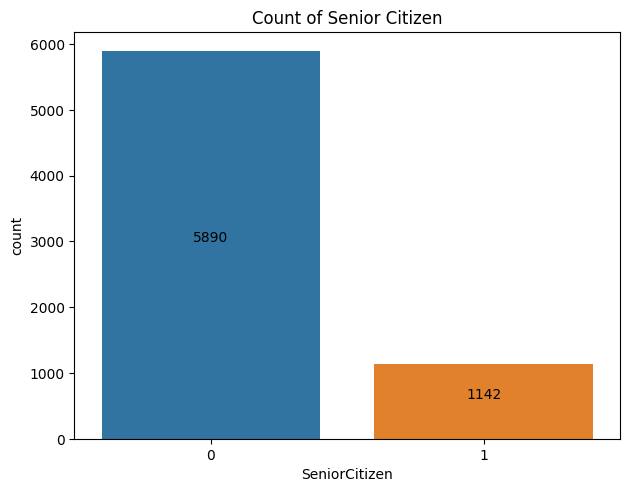

In [28]:
ax = sns.countplot(x='SeniorCitizen', data=c_data)
vc = c_data['SeniorCitizen'].value_counts()
for p in ax.patches:
    # Get the x and y coordinates of the bar
    x_coord = p.get_x() + p.get_width() / 2
    y_coord = p.get_height()
    
    # Format the text you want to display as the annotation
    count = int(y_coord)  # Convert the count to an integer if needed
    text = f'{count}'  # Customize the text as desired
    
    # Add the annotation to the plot
    ax.text(x=x_coord, y=y_coord/2, s=text, ha='center', va='bottom')
plt.tight_layout()
plt.title('Count of Senior Citizen')
plt.show()

There are 5901 non senior citizen and 1142 are senior citizen.

## Bivariate Analysis

In [29]:
#Term = pd.crosstab(LPcat['Term'],LPcat['Loan Status'])
#Term.div(Term.sum(1).astype(float), axis = 0).plot(kind = 'bar',stacked = True, figsize = (6,6))
#plt.show()

### Gender vs Tenure vs MonthlyCharges

[Text(0.5, 1.0, 'distribution of Monthly Charges')]

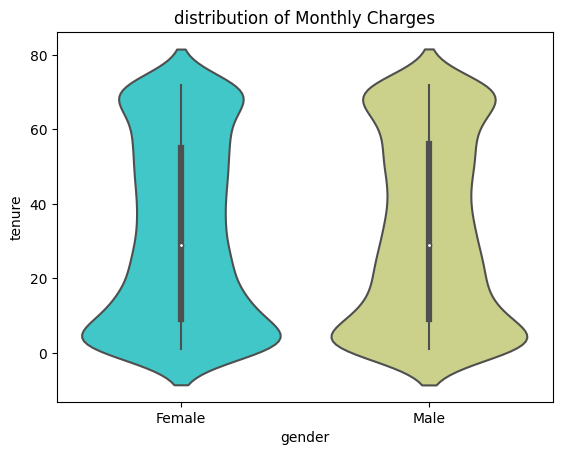

In [30]:
sns.violinplot(x='gender',y='tenure',data=c_data,palette='rainbow').set(title = 'distribution of Monthly Charges')


[Text(0.5, 1.0, 'distribution of Monthly Charges')]

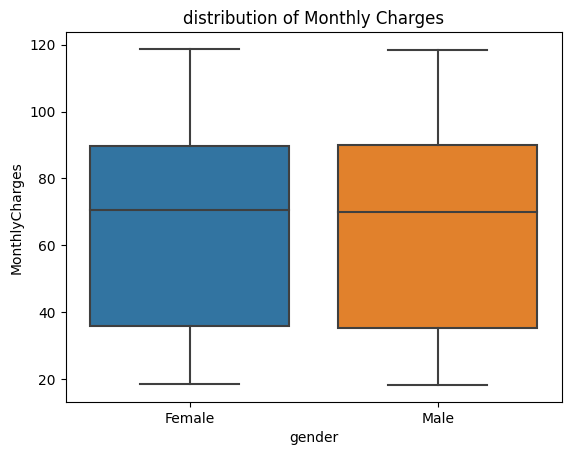

In [31]:
sns.boxplot(x='gender',y='MonthlyCharges',data=c_data).set(title = 'distribution of Monthly Charges')

### Dependents vs Tenure vs MonthlyCharges

[Text(0.5, 1.0, 'distribution of Monthly Charges')]

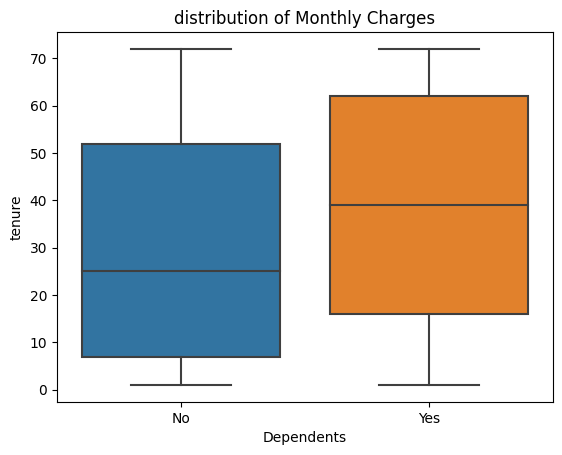

In [32]:
sns.boxplot(x='Dependents',y='tenure',data=c_data).set(title = 'distribution of Monthly Charges')


[Text(0.5, 1.0, 'distribution of Monthly Charges')]

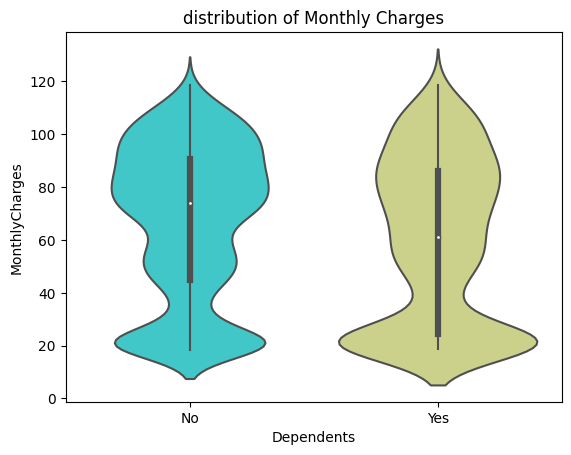

In [33]:
sns.violinplot(x='Dependents',y='MonthlyCharges',data=c_data, palette='rainbow').set(title = 'distribution of Monthly Charges')


### Churn vs tenure vs MonthlyCharges

[Text(0.5, 1.0, 'distribution of Monthly Charges')]

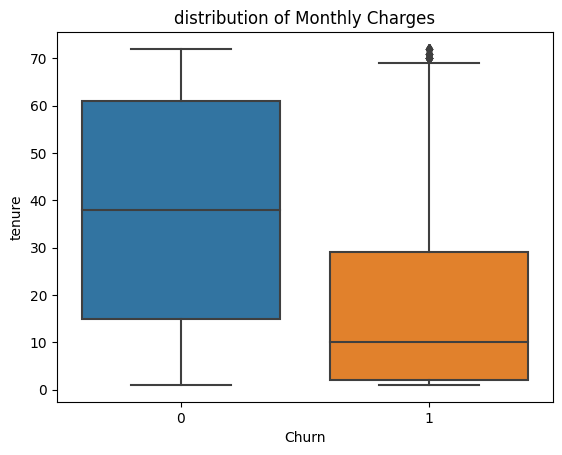

In [34]:
sns.boxplot(x='Churn',y='tenure', data=c_data).set(title = 'distribution of Monthly Charges')


[Text(0.5, 1.0, 'distribution of Monthly Charges')]

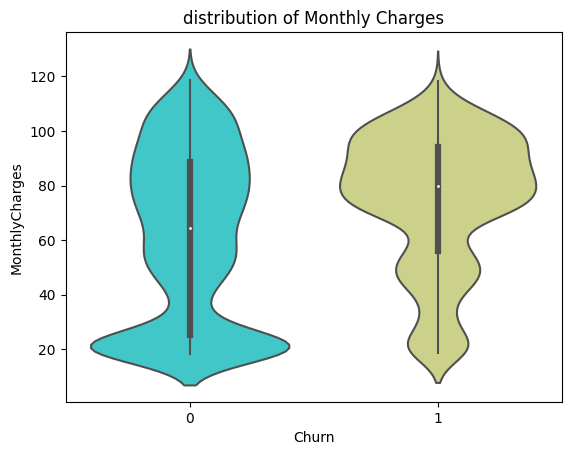

In [35]:
sns.violinplot(x='Churn',y='MonthlyCharges', data=c_data, palette='rainbow').set(title = 'distribution of Monthly Charges')


### Pairgrid

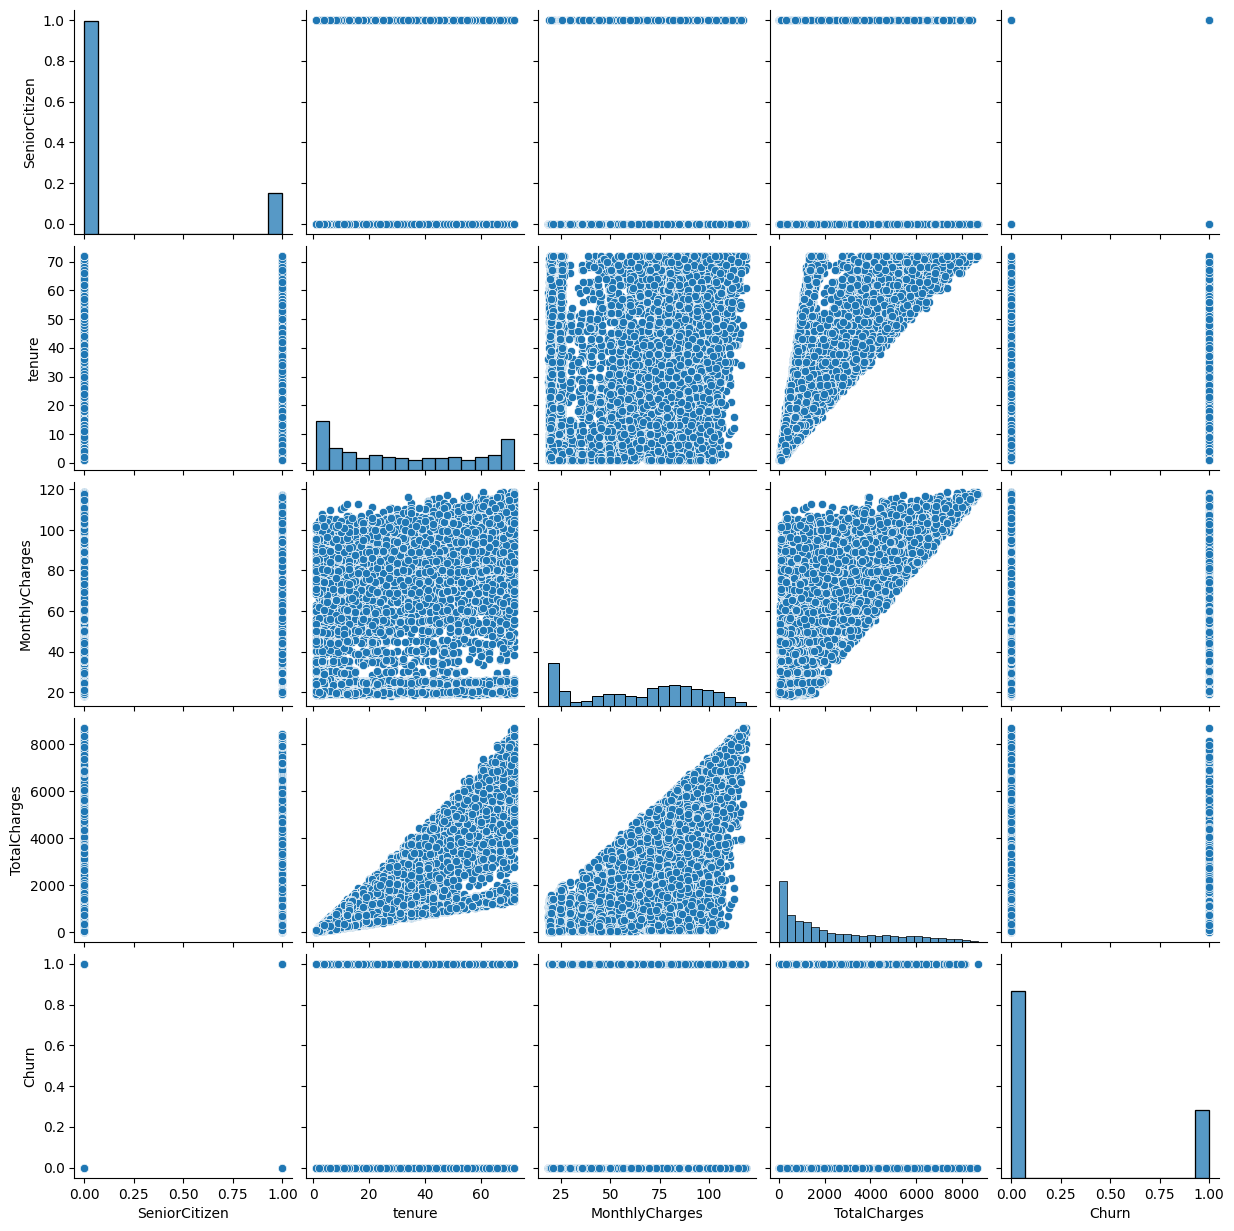

In [36]:
pair_grid = sns.pairplot(c_data)

## Deep dive into relationship with Churn 

What is the relationship between Churn and all the services offerd by vodafone? 
 
The services offered by Vodafone include:
- PhoneService         
- MultipleLines        
- InternetService      
- OnlineSecurity       
- OnlineBackup         
- DeviceProtection     
- TechSupport          
- StreamingTV          
- StreamingMovies 

#### Relationship between Phone Service and Churn


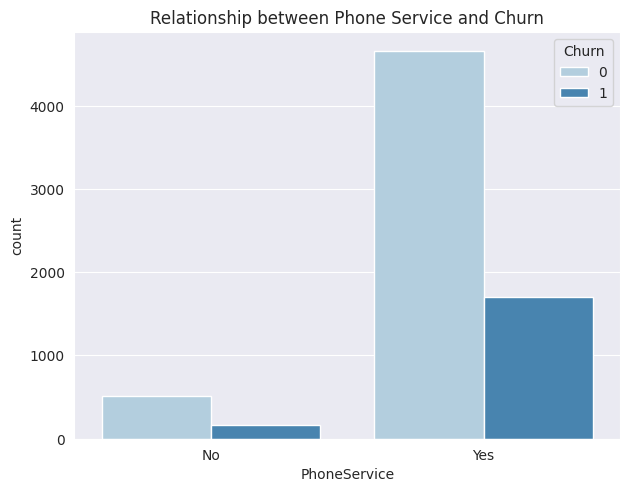

In [37]:
sns.set_style('darkgrid')     
sns.countplot(x='PhoneService', hue='Churn', data=c_data, palette='Blues')
vc = c_data['PhoneService'].value_counts()
for p in ax.patches:
    # Get the x and y coordinates of the bar
    x_coord = p.get_x() + p.get_width() / 2
    y_coord = p.get_height()
    
    # Format the text you want to display as the annotation
    count = int(y_coord)  # Convert the count to an integer if needed
    text = f'{count}'  # Customize the text as desired
    
    # Add the annotation to the plot
    ax.text(x=x_coord, y=y_coord/2, s=text, ha='center', va='bottom')
plt.tight_layout()
plt.title('Relationship between Phone Service and Churn')
plt.show()


#### Relationship between Multiple Lines and Churn

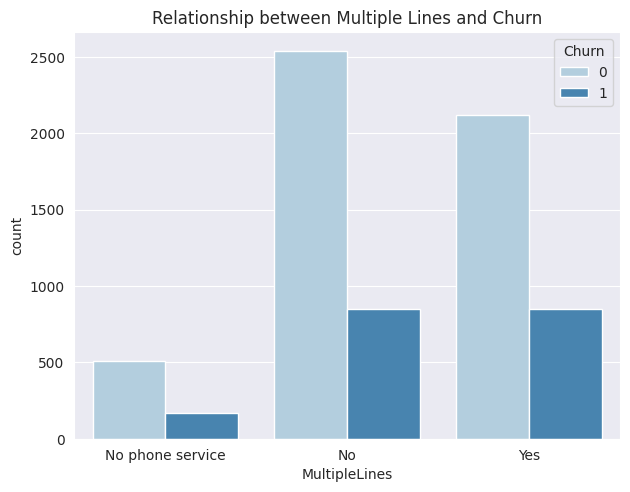

In [38]:
sns.set_style('darkgrid')     
sns.countplot(x='MultipleLines', hue='Churn', data=c_data, palette='Blues')
vc = c_data['MultipleLines'].value_counts()
for p in ax.patches:
    # Get the x and y coordinates of the bar
    x_coord = p.get_x() + p.get_width() / 2
    y_coord = p.get_height()
    
    # Format the text you want to display as the annotation
    count = int(y_coord)  # Convert the count to an integer if needed
    text = f'{count}'  # Customize the text as desired
    
    # Add the annotation to the plot
    ax.text(x=x_coord, y=y_coord/2, s=text, ha='center', va='bottom')
plt.tight_layout()
plt.title('Relationship between Multiple Lines and Churn')
plt.show()

#### Relationship between Online Backup and Churn   


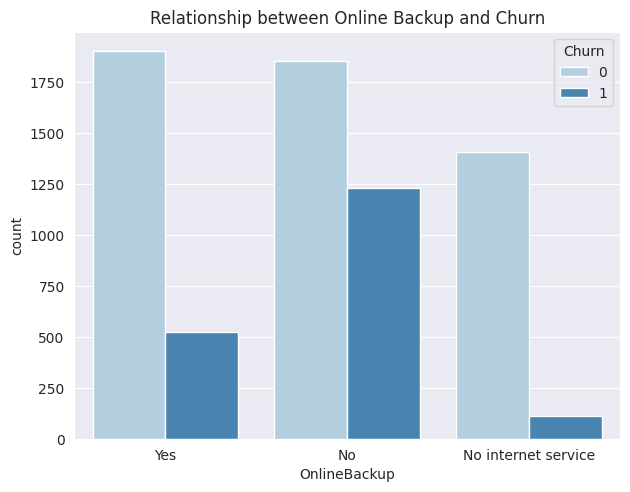

In [39]:
sns.set_style('darkgrid')     
sns.countplot(x='OnlineBackup', hue='Churn', data=c_data, palette='Blues')
vc = c_data['OnlineBackup'].value_counts()
for p in ax.patches:
    # Get the x and y coordinates of the bar
    x_coord = p.get_x() + p.get_width() / 2
    y_coord = p.get_height()
    
    # Format the text you want to display as the annotation
    count = int(y_coord)  # Convert the count to an integer if needed
    text = f'{count}'  # Customize the text as desired
    
    # Add the annotation to the plot
    ax.text(x=x_coord, y=y_coord/2, s=text, ha='center', va='bottom')
plt.tight_layout()
plt.title('Relationship between Online Backup and Churn')
plt.show()

#### Relationship between Online Security and Churn       


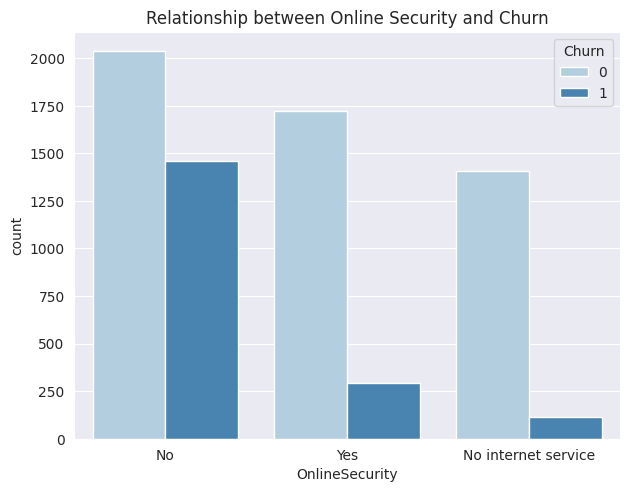

In [40]:
sns.set_style('darkgrid')     
sns.countplot(x='OnlineSecurity', hue='Churn', data=c_data, palette='Blues')
vc = c_data['OnlineSecurity'].value_counts()
for p in ax.patches:
    # Get the x and y coordinates of the bar
    x_coord = p.get_x() + p.get_width() / 2
    y_coord = p.get_height()
    
    # Format the text you want to display as the annotation
    count = int(y_coord)  # Convert the count to an integer if needed
    text = f'{count}'  # Customize the text as desired
    
    # Add the annotation to the plot
    ax.text(x=x_coord, y=y_coord/2, s=text, ha='center', va='bottom')
plt.tight_layout()
plt.title('Relationship between Online Security and Churn')
plt.show()

#### Relationship between Streaming Movies and Churn 

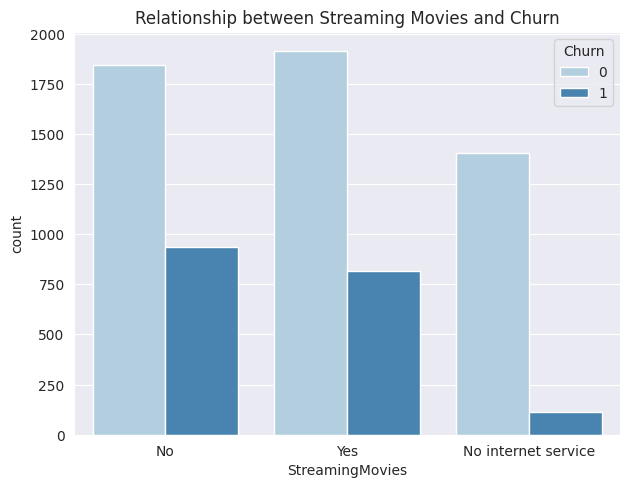

In [41]:
sns.set_style('darkgrid')     
sns.countplot(x='StreamingMovies', hue='Churn', data=c_data, palette='Blues')
vc = c_data['StreamingMovies'].value_counts()
for p in ax.patches:
    # Get the x and y coordinates of the bar
    x_coord = p.get_x() + p.get_width() / 2
    y_coord = p.get_height()
    
    # Format the text you want to display as the annotation
    count = int(y_coord)  # Convert the count to an integer if needed
    text = f'{count}'  # Customize the text as desired
    
    # Add the annotation to the plot
    ax.text(x=x_coord, y=y_coord/2, s=text, ha='center', va='bottom')
plt.tight_layout()
plt.title('Relationship between Streaming Movies and Churn')
plt.show()

#### Relationship between Streaming TV and Churn          

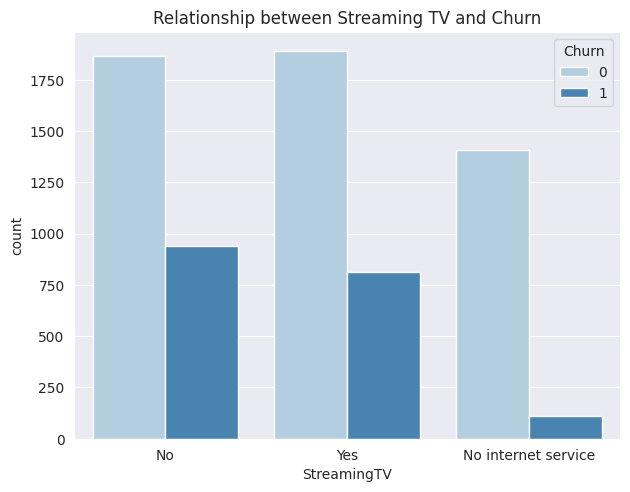

In [42]:
sns.set_style('darkgrid')     
sns.countplot(x='StreamingTV', hue='Churn', data=c_data, palette='Blues')
vc = c_data['StreamingTV'].value_counts()
for p in ax.patches:
    # Get the x and y coordinates of the bar
    x_coord = p.get_x() + p.get_width() / 2
    y_coord = p.get_height()
    
    # Format the text you want to display as the annotation
    count = int(y_coord)  # Convert the count to an integer if needed
    text = f'{count}'  # Customize the text as desired
    
    # Add the annotation to the plot
    ax.text(x=x_coord, y=y_coord/2, s=text, ha='center', va='bottom')
plt.tight_layout()
plt.title('Relationship between Streaming TV and Churn')
plt.show()

#### Relationship between Tech Support and Churn      

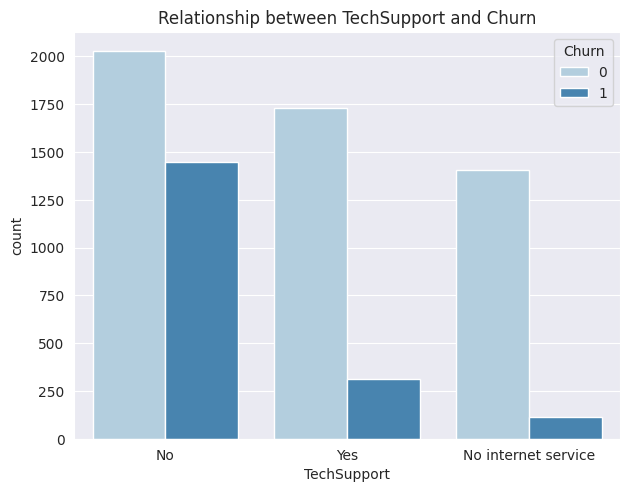

In [43]:
sns.set_style('darkgrid')     
sns.countplot(x='TechSupport', hue='Churn', data=c_data, palette='Blues')
vc = c_data['TechSupport'].value_counts()
for p in ax.patches:
    # Get the x and y coordinates of the bar
    x_coord = p.get_x() + p.get_width() / 2
    y_coord = p.get_height()
    
    # Format the text you want to display as the annotation
    count = int(y_coord)  # Convert the count to an integer if needed
    text = f'{count}'  # Customize the text as desired
    
    # Add the annotation to the plot
    ax.text(x=x_coord, y=y_coord/2, s=text, ha='center', va='bottom')
plt.tight_layout()
plt.title('Relationship between TechSupport and Churn')
plt.show()

#### Relationship between Device Protection and Churn     

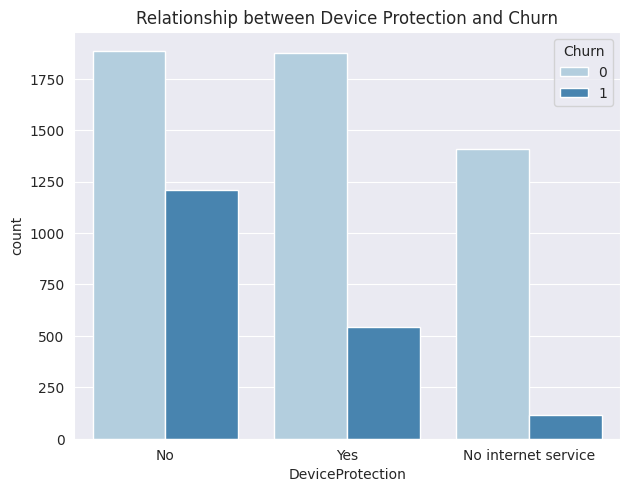

In [44]:
sns.set_style('darkgrid')     
sns.countplot(x='DeviceProtection', hue='Churn', data=c_data, palette='Blues')
vc = c_data['DeviceProtection'].value_counts()
for p in ax.patches:
    # Get the x and y coordinates of the bar
    x_coord = p.get_x() + p.get_width() / 2
    y_coord = p.get_height()
    
    # Format the text you want to display as the annotation
    count = int(y_coord)  # Convert the count to an integer if needed
    text = f'{count}'  # Customize the text as desired
    
    # Add the annotation to the plot
    ax.text(x=x_coord, y=y_coord/2, s=text, ha='center', va='bottom')
plt.tight_layout()
plt.title('Relationship between Device Protection and Churn')
plt.show()

#### Relationship between Senior Citizen and Churn

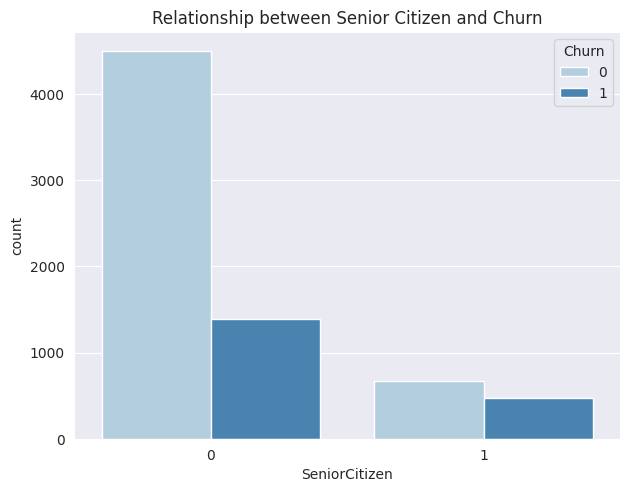

In [45]:
sns.set_style('darkgrid')     
sns.countplot(x='SeniorCitizen', hue='Churn', data=c_data, palette='Blues')
vc = c_data['SeniorCitizen'].value_counts()
for p in ax.patches:
    # Get the x and y coordinates of the bar
    x_coord = p.get_x() + p.get_width() / 2
    y_coord = p.get_height()
    
    # Format the text you want to display as the annotation
    count = int(y_coord)  # Convert the count to an integer if needed
    text = f'{count}'  # Customize the text as desired
    
    # Add the annotation to the plot
    ax.text(x=x_coord, y=y_coord/2, s=text, ha='center', va='bottom')
plt.tight_layout()
plt.title('Relationship between Senior Citizen and Churn')
plt.show()

-         


#### Relationship between Internet Service and Churn


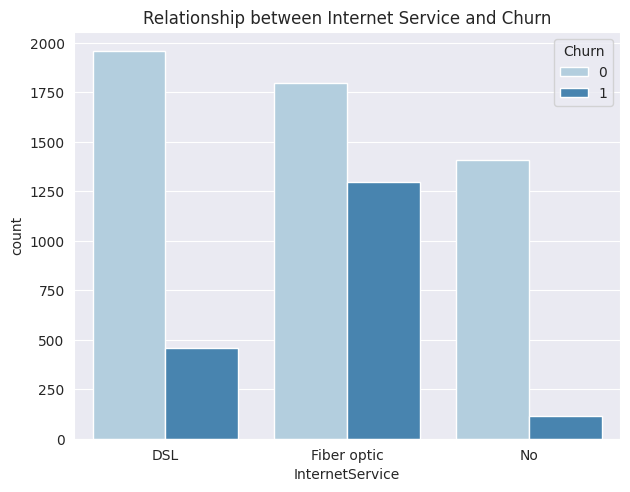

In [46]:
sns.set_style('darkgrid')
sns.countplot(x='InternetService', hue='Churn', data=c_data, palette='Blues')
vc = c_data['InternetService'].value_counts()
for p in ax.patches:
    # Get the x and y coordinates of the bar
    x_coord = p.get_x() + p.get_width() / 2
    y_coord = p.get_height()
    
    # Format the text you want to display as the annotation
    count = int(y_coord)  # Convert the count to an integer if needed
    text = f'{count}'  # Customize the text as desired
    
    # Add the annotation to the plot
    ax.text(x=x_coord, y=y_coord/2, s=text, ha='center', va='bottom')
plt.tight_layout()
plt.title('Relationship between Internet Service and Churn')
plt.show()


## Important Note

## Multvarite Analysis

In [47]:
# Multvarite 
# correlation and heatmap
# pair plot     
#sns.pairplot(c_data, hue='Churn')
#sns.boxplot(x='Contract', y='MonthlyCharges', hue='Churn', data=c_data)


## Encoding of Categorical Columns

In [48]:
LE = LabelEncoder()
c_data['gender'] = LE.fit_transform(c_data['gender'])
c_data['Partner'] = LE.fit_transform(c_data['Partner'])
c_data['Dependents'] = LE.fit_transform(c_data['Dependents'])
c_data['PhoneService'] = LE.fit_transform(c_data['PhoneService'])
c_data['MultipleLines'] = LE.fit_transform(c_data['MultipleLines'])
c_data['InternetService'] = LE.fit_transform(c_data['InternetService'])
c_data['OnlineSecurity'] = LE.fit_transform(c_data['OnlineSecurity'])
c_data['OnlineBackup'] = LE.fit_transform(c_data['OnlineBackup'])
c_data['DeviceProtection'] = LE.fit_transform(c_data['DeviceProtection'])
c_data['TechSupport'] = LE.fit_transform(c_data['TechSupport'])
c_data['StreamingTV'] = LE.fit_transform(c_data['StreamingTV'])
c_data['StreamingMovies'] = LE.fit_transform(c_data['StreamingMovies'])
c_data['Contract'] = LE.fit_transform(c_data['Contract'])
c_data['PaperlessBilling'] = LE.fit_transform(c_data['PaperlessBilling'])
c_data['PaymentMethod'] = LE.fit_transform(c_data['PaymentMethod'])

In [49]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int64  


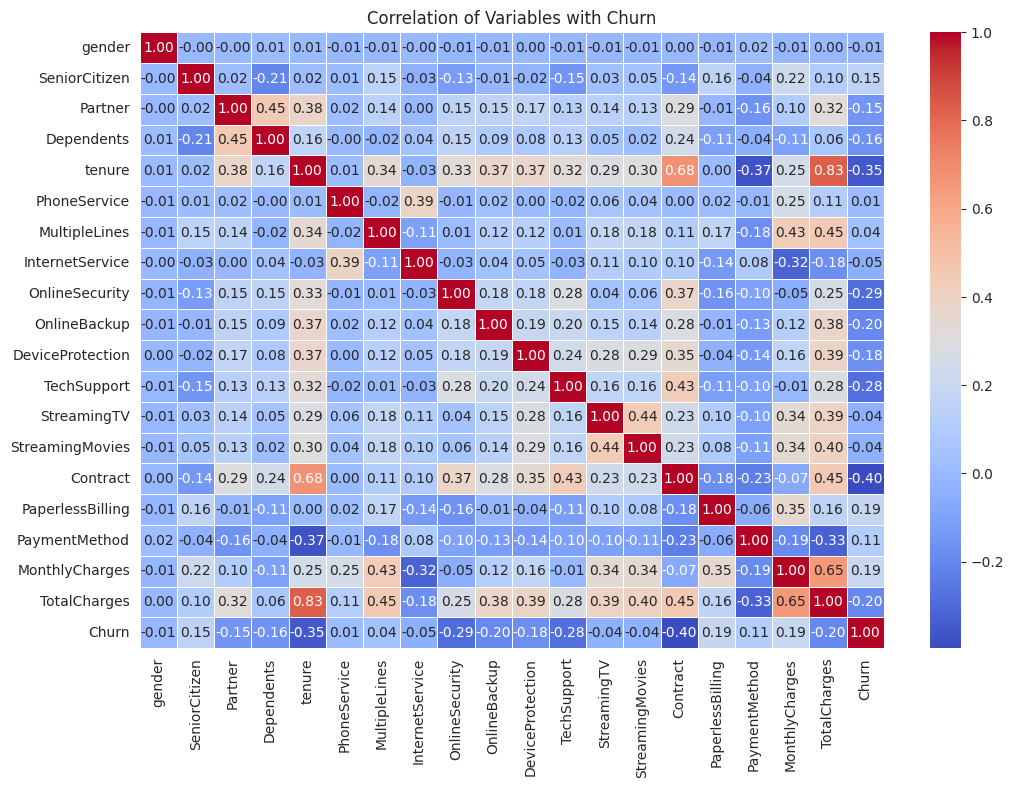

In [50]:
# Compute correlation matrix
correlation_matrix = c_data.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation of Variables with Churn')
plt.show()

In [51]:
#c_data.drop('customerID', axis=1, inplace=True)
# save to csv

## Important Note

In [52]:
#For machine learning use bagging and boosting, these do not need dealing with imbalance data. 
#Ensemble methods: Ensemble methods, such as bagging or boosting, can be effective in handling imbalanced datasets. 
#Techniques like Random Forests or Gradient Boosting can better handle class imbalance by combining multiple weak models.


#For other machine learning deal with imbalance data by using SMOTE (Synthetic Minority Over-sampling Technique), or ADASYN (Adaptive Synthetic Sampling).
#

In [53]:
y= c_data['Churn']                         # Target Variable
X = c_data.drop('Churn', axis =1)          # Independent Variable

In [54]:
scaler = StandardScaler()
cs = scaler.fit_transform(X)
csn = pd.DataFrame(cs, columns = X.columns)
csn.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009430,-0.440327,1.035617,-0.652305,-1.280248,-3.056334,0.062666,-1.183614,-0.917837,1.242875,-1.026988,-0.924267,-1.112632,-1.121501,-0.826735,0.828939,0.399805,-1.161694,-0.994194
1,0.990658,-0.440327,-0.965608,-0.652305,0.064303,0.327189,-0.991564,-1.183614,1.408012,-1.028998,1.245441,-0.924267,-1.112632,-1.121501,0.373926,-1.206361,1.336636,-0.260878,-0.173740
2,0.990658,-0.440327,-0.965608,-0.652305,-1.239504,0.327189,-0.991564,-1.183614,1.408012,1.242875,-1.026988,-0.924267,-1.112632,-1.121501,-0.826735,0.828939,1.336636,-0.363923,-0.959649
3,0.990658,-0.440327,-0.965608,-0.652305,0.512486,-3.056334,0.062666,-1.183614,1.408012,-1.028998,1.245441,1.396963,-1.112632,-1.121501,0.373926,-1.206361,-1.473857,-0.747850,-0.195248
4,-1.009430,-0.440327,-0.965608,-0.652305,-1.239504,0.327189,-0.991564,0.172835,-0.917837,-1.028998,-1.026988,-0.924267,-1.112632,-1.121501,-0.826735,0.828939,0.399805,0.196178,-0.940457


In [55]:
def plot_metric(confusion, name):
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
    confusion.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
    confusion.flatten()/np.sum(confusion)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
    zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    ax = sns.heatmap(confusion, annot=labels, fmt='', cmap='viridis')
    ax.set_title(f'{name}\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    ## Display the visualization of the Confusion Matrix.
    plt.show()

## Machine Models With Resampling

In [56]:
X_resampled,y_resampled = ADASYN().fit_resample(X,y)
X_resampled.shape,y_resampled.shape

((10392, 19), (10392,))

In [57]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_resampled)))

Original dataset shape Counter({0: 5163, 1: 1869})
Resampled dataset shape Counter({1: 5229, 0: 5163})


In [58]:
X_s = X_resampled
y_s = y_resampled

In [59]:
# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(X_s, y_s, random_state=0)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: {}\n size of validation set: {}\n size of test set:" " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))


Size of training set: 5845
 size of validation set: 1949
 size of test set: 2598



### RandomForest

train set score: 99.90
test set score: 83.43

Accuracy Score: 83.43%

Precision Score: 83.63%

Recall Score: 82.68%

F1 Score: 83.15%

AUC score is: 91.5 %



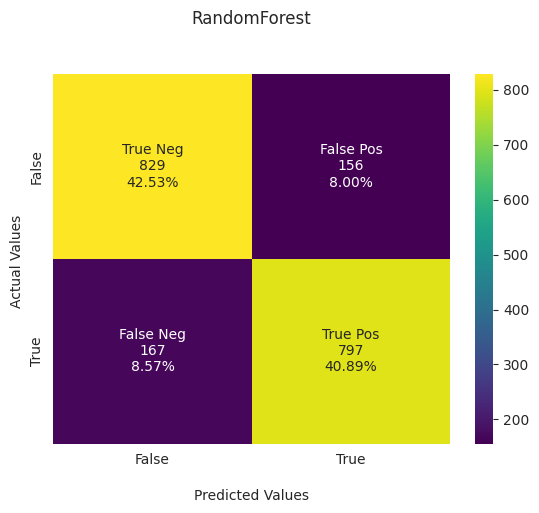

In [60]:
crf = RandomForestClassifier()
# Fit 'LPknn' to the training set
crf.fit(X_train, y_train)

# Predict Output
crf_predict = crf.predict(X_valid)
pred_crf = crf.predict_proba(X_valid)[:,1]

#Train and Test Scores
crf_Tr_Score = round(crf.score(X_train, y_train)*100, 2)
crf_Tt_Score = round(crf.score(X_valid, y_valid)*100, 2)
print('train set score: {:.2f}'.format(crf_Tr_Score))
print('test set score: {:.2f}'.format(crf_Tt_Score))



print()
crf_sc = round(accuracy_score(y_valid, crf_predict)*100, 2)
print("Accuracy Score: {}%".format(crf_sc))
print()
PS_crf = round(precision_score(y_valid, crf_predict)*100, 2)
print("Precision Score: {}%".format(PS_crf))
print()
RS_crf = round(recall_score(y_valid, crf_predict)*100, 2)
print("Recall Score: {}%".format(RS_crf))
print()
FS_crf = round(f1_score(y_valid, crf_predict)*100, 2)
print("F1 Score: {}%".format(FS_crf))
print()
fpr4, tpr4, threshold = roc_curve(y_valid, pred_crf)
roc_auc = metrics.auc(fpr4, tpr4)
crfA = round(metrics.auc(fpr4, tpr4)*100, 2)
print(f'AUC score is:', crfA,'%')
print()
confusion = confusion_matrix(y_valid, crf_predict)
#print("Confusion matrix:\n{}".format(confusion))
plot_metric(confusion, "RandomForest")

### Support Vector Machine


train set score: 96.53
test set score: 78.50

Accuracy Score: 78.5%

Precision Score: 80.52%

Recall Score: 74.59%

F1 Score: 77.44%

AUC score is: 84.25 %



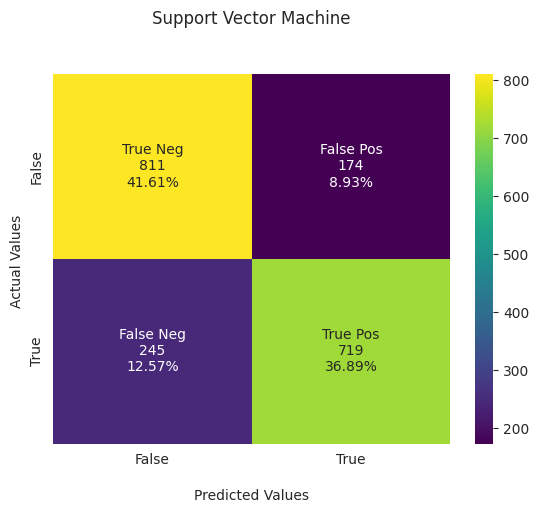

In [61]:
csvc = SVC(gamma='auto', probability=True)
# Fit 'LPknn' to the training set
csvc.fit(X_train, y_train)

# Predict Output
csvc_predict = csvc.predict(X_valid)
pred_csvc = csvc.predict_proba(X_valid)[:,1]
#pred_crf = crf.predict_proba(X_valid)[:,1]

#Train and Test Scores
csvc_Tr_Score = round(csvc.score(X_train, y_train)*100, 2)
csvc_Tt_Score = round(csvc.score(X_valid, y_valid)*100, 2)
print('train set score: {:.2f}'.format(csvc_Tr_Score))
print('test set score: {:.2f}'.format(csvc_Tt_Score))



print()
csvc_sc = round(accuracy_score(y_valid, csvc_predict)*100, 2)
print("Accuracy Score: {}%".format(csvc_sc))
print()
PS_csvc = round(precision_score(y_valid, csvc_predict)*100, 2)
print("Precision Score: {}%".format(PS_csvc))
print()
RS_csvc = round(recall_score(y_valid, csvc_predict)*100, 2)
print("Recall Score: {}%".format(RS_csvc))
print()
FS_csvc = round(f1_score(y_valid, csvc_predict)*100, 2)
print("F1 Score: {}%".format(FS_csvc))
print()
fpr4, tpr4, threshold = roc_curve(y_valid, pred_csvc)
roc_auc = metrics.auc(fpr4, tpr4)
csvcA = round(metrics.auc(fpr4, tpr4)*100, 2)
print(f'AUC score is:', csvcA,'%')
print()
confusion = confusion_matrix(y_valid, csvc_predict)
#print("Confusion matrix:\n{}".format(confusion))
plot_metric(confusion, "Support Vector Machine")

### K- Nearest Neighbors

train set score: 78.67
test set score: 72.55

Accuracy Score: 72.55%

Precision Score: 68.87%

Recall Score: 81.22%

F1 Score: 0.75%

AUC score is: 79.26 %



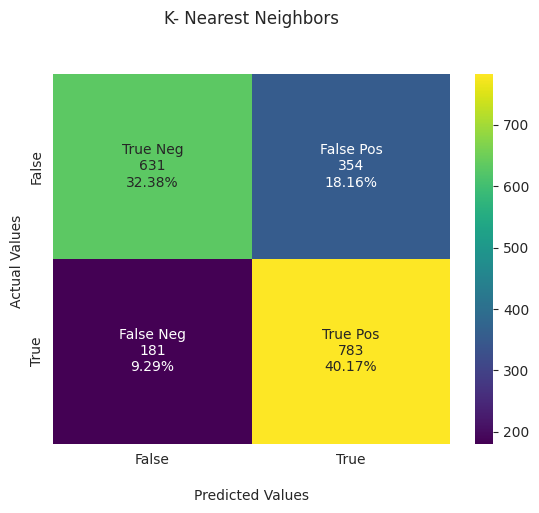

In [62]:
cknn = KNeighborsClassifier(n_neighbors=7)

# Fit 'LPknn' to the training set
cknn.fit(X_train, y_train)

# Predict Output
cknn_predict = cknn.predict(X_valid)
pred_cknn = cknn.predict_proba(X_valid)[:,1]

#Train and Test Scores
cknn_Tr_Score = round(cknn.score(X_train, y_train)*100, 2)
cknn_Tt_Score = round(cknn.score(X_valid, y_valid)*100, 2)
print('train set score: {:.2f}'.format(cknn_Tr_Score))
print('test set score: {:.2f}'.format(cknn_Tt_Score))



print()
cknn_sc = round(accuracy_score(y_valid, cknn_predict)*100, 2)
print("Accuracy Score: {}%".format(cknn_sc))
print()
PS_cknn = round(precision_score(y_valid, cknn_predict)*100, 2)
print("Precision Score: {}%".format(PS_cknn))
print()
RS_cknn = round(recall_score(y_valid, cknn_predict)*100, 2)
print("Recall Score: {}%".format(RS_cknn))
print()
FS_cknn = round(f1_score(y_valid, cknn_predict), 2)
print("F1 Score: {}%".format(FS_cknn))
print()
fpr4, tpr4, threshold = roc_curve(y_valid, pred_cknn)
roc_auc = metrics.auc(fpr4, tpr4)
cknnA = round(metrics.auc(fpr4, tpr4)*100, 2)
print(f'AUC score is:', cknnA,'%')
print()
confusion = confusion_matrix(y_valid, cknn_predict)
#print("Confusion matrix:\n{}".format(confusion))
plot_metric(confusion, "K- Nearest Neighbors")

### Extra Trees Classifier

train set score: 99.90
test set score: 82.40

Accuracy Score: 82.4%

Precision Score: 83.64%

Recall Score: 80.08%

F1 Score: 81.82%

AUC score is: 90.33 %



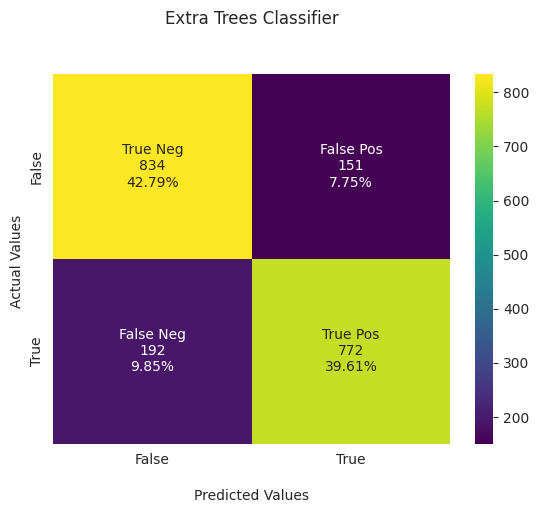

In [63]:
crc = ExtraTreesClassifier()

# Fit 'LPknn' to the training set
crc.fit(X_train, y_train)

# Predict Output
crc_predict = crc.predict(X_valid)
pred_crc = crc.predict_proba(X_valid)[:,1]

#Train and Test Scores
crc_Tr_Score = round(crc.score(X_train, y_train)*100, 2)
crc_Tt_Score = round(crc.score(X_valid, y_valid)*100, 2)
print('train set score: {:.2f}'.format(crc_Tr_Score))
print('test set score: {:.2f}'.format(crc_Tt_Score))



print()
crc_sc = round(accuracy_score(y_valid, crc_predict)*100, 2)
print("Accuracy Score: {}%".format(crc_sc))
print()
PS_crc = round(precision_score(y_valid, crc_predict)*100, 2)
print("Precision Score: {}%".format(PS_crc))
print()
RS_crc = round(recall_score(y_valid, crc_predict)*100, 2)
print("Recall Score: {}%".format(RS_crc))
print()
FS_crc = round(f1_score(y_valid, crc_predict)*100, 2)
print("F1 Score: {}%".format(FS_crc))
print()
fpr4, tpr4, threshold = roc_curve(y_valid, pred_crc)
roc_auc = metrics.auc(fpr4, tpr4)
crcA = round(metrics.auc(fpr4, tpr4)*100, 2)
print(f'AUC score is:', crcA,'%')
print()
confusion = confusion_matrix(y_valid, crc_predict)
#print("Confusion matrix:\n{}".format(confusion))
plot_metric(confusion, "Extra Trees Classifier")

## Machine Learning Model without Resampling

In [64]:
# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=0)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: {}\n size of validation set: {}\n size of test set:" " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))


Size of training set: 3955
 size of validation set: 1319
 size of test set: 1758



### Histgram Gradient Boosting Classifier



train set score: 90.95
test set score: 78.39

Accuracy Score: 78.39%

Precision Score: 65.68%

Recall Score: 48.11%

F1 Score: 0.56%

AUC score is: 83.07 %




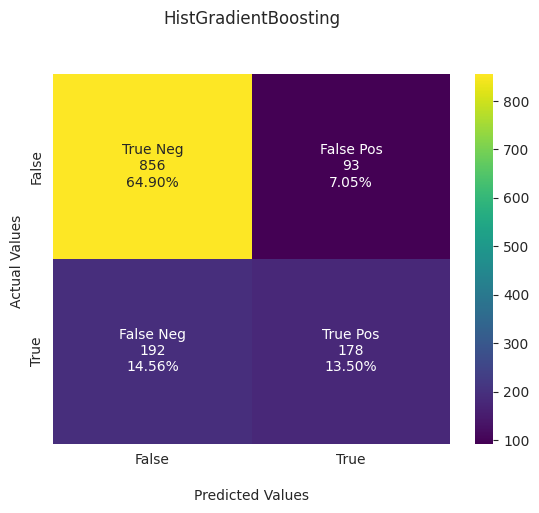

In [65]:
LPdt = HistGradientBoostingClassifier() 

#Fit 'LPdt' to the training set
LPdt.fit(X_train, y_train)

# Predict Output
dy_predict = LPdt.predict(X_valid)
pred_LPdt = LPdt.predict_proba(X_valid)[:,1]

#Train and Test Scores
LPdt_Tr_Score = round(LPdt.score(X_train, y_train)*100, 2)
LPdt_Tt_Score = round(LPdt.score(X_valid, y_valid)*100, 2)
print('train set score: {:.2f}'.format(LPdt_Tr_Score))
print('test set score: {:.2f}'.format(LPdt_Tt_Score))


print()
LPdt_sc = round(accuracy_score(y_valid, dy_predict)*100, 2)
print("Accuracy Score: {}%".format(LPdt_sc))
print()
PS_dt = round(precision_score(y_valid, dy_predict)*100, 2)
print("Precision Score: {}%".format(PS_dt))
print()
RS_dt = round(recall_score(y_valid, dy_predict)*100, 2)
print("Recall Score: {}%".format(RS_dt))
print()
FS_dt = round(f1_score(y_valid, dy_predict), 2)
print("F1 Score: {}%".format(FS_dt))
print()
fpr1, tpr1, threshold = roc_curve(y_valid, pred_LPdt)
roc_auc = metrics.auc(fpr1, tpr1)
LPhgbA = round(metrics.auc(fpr1, tpr1)*100, 2)
print(f'AUC score is:', LPhgbA,'%')
print()
confusion = confusion_matrix(y_valid, dy_predict)
#print("Confusion matrix:\n{}".format(confusion))
print()
plot_metric(confusion, "HistGradientBoosting")

### AdaBoostClassifier

train set score: 81.29
test set score: 79.30

Accuracy Score: 79.3%

Precision Score: 67.02%

Recall Score: 51.62%

F1 Score: 58.32%

AUC score is: 83.93 %




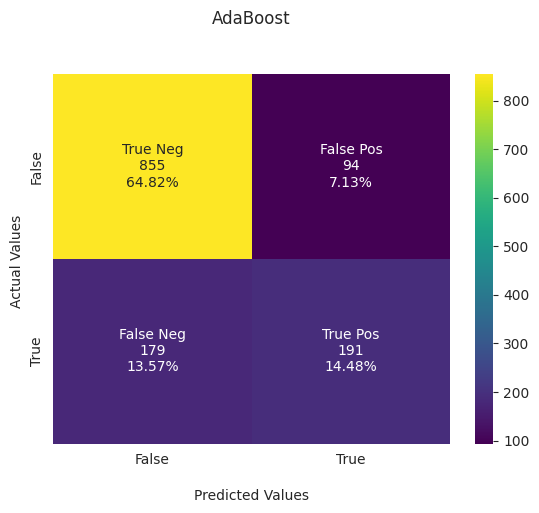

In [66]:
LPrf = AdaBoostClassifier(n_estimators=100, random_state=0)

#Fit 'LPrf' to the training set
LPrf.fit(X_train, y_train)

# Predict Output
ry_predict = LPrf.predict(X_valid)
pred_LPrf = LPrf.predict_proba(X_valid)[:,1]

#Train and Test Scores
LPrf_Tr_Score = round(LPrf.score(X_train, y_train)*100, 2)
LPrf_Tt_Score = round(LPrf.score(X_valid, y_valid)*100, 2)
print('train set score: {:.2f}'.format(LPrf_Tr_Score))
print('test set score: {:.2f}'.format(LPrf_Tt_Score))


print()
LPrf_sc = round(accuracy_score(y_valid, ry_predict)*100, 2)
print("Accuracy Score: {}%".format(LPrf_sc))
print()
PS_rf = round(precision_score(y_valid, ry_predict)*100, 2)
print("Precision Score: {}%".format(PS_rf))
print()
RS_rf = round(recall_score(y_valid, ry_predict)*100, 2)
print("Recall Score: {}%".format(RS_rf))
print()
FS_rf = round(f1_score(y_valid, ry_predict)*100, 2)
print("F1 Score: {}%".format(FS_rf))
print()
fpr2, tpr2, threshold = roc_curve(y_valid, pred_LPrf)
roc_auc = metrics.auc(fpr2, tpr2)
LPabtA = round(metrics.auc(fpr2, tpr2)*100, 2)
print(f'AUC score is:', LPabtA,'%')
print()
confusion = confusion_matrix(y_valid, ry_predict)
#print("Confusion matrix:\n{}".format(confusion))
print()
plot_metric(confusion, "AdaBoost")

### GradientBoostingClassifier


train set score: 81.29
test set score: 79.08

Accuracy Score: 79.08%

Precision Score: 67.94%

Recall Score: 48.11%

F1 Score: 56.33%

AUC score is: 84.4 %



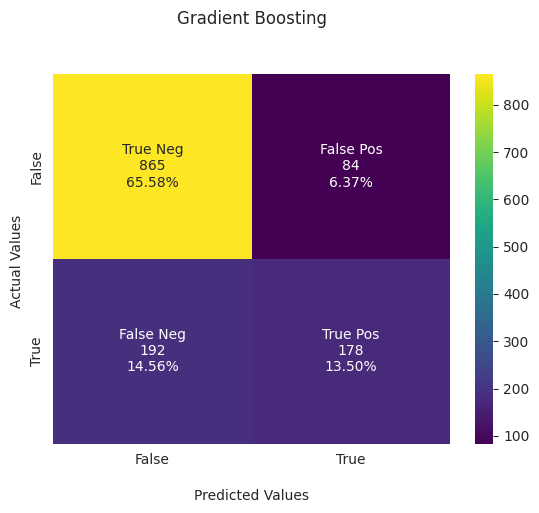

In [67]:
LPgbm = GradientBoostingClassifier()

#Fit 'LPsvm' to the training set
LPgbm.fit(X_train, y_train)

# Predict Output
gy_predict = LPgbm.predict(X_valid)
pred_LPgbm = LPgbm.predict_proba(X_valid)[:,1]


#Train and Test Scores
LPgbm_Tr_Score = round(LPgbm.score(X_train, y_train)*100, 2)
LPgbm_Tt_Score = round(LPgbm.score(X_valid, y_valid)*100, 2)
print('train set score: {:.2f}'.format(LPrf_Tr_Score))
print('test set score: {:.2f}'.format(LPgbm_Tt_Score))


print()
LPgbm_sc = round(accuracy_score(y_valid, gy_predict)*100, 2)
print("Accuracy Score: {}%".format(LPgbm_sc))
print()
PS_gbm = round(precision_score(y_valid, gy_predict)*100, 2)
print("Precision Score: {}%".format(PS_gbm))
print()
RS_gbm = round(recall_score(y_valid, gy_predict)*100, 2)
print("Recall Score: {}%".format(RS_gbm))
print()
FS_gbm = round(f1_score(y_valid, gy_predict)*100, 2)
print("F1 Score: {}%".format(FS_gbm))
print()
fpr5, tpr5, threshold = roc_curve(y_valid, pred_LPgbm)
roc_auc = metrics.auc(fpr5, tpr5)
LPgbmA = round(metrics.auc(fpr5, tpr5)*100, 2)
print(f'AUC score is:', LPgbmA,'%')
print()
confusion = confusion_matrix(y_valid, gy_predict)
#print("Confusion matrix:\n{}".format(confusion))
plot_metric(confusion, "Gradient Boosting")